# Coronavirus: A Faith Response

### Coronavirus has been the most spoken topic of 2020 so far. The first news of its outbreak came out by the end of January and then many cases were registered all over the world. That was the start of the global pandemic. Many countries went in lockdown, shops were closed, only supermarket, pharmacies and hospital were open. All over the world was possible to notice people disappointment and anger towards this virus. Many times we have heard that this virus was God's punishment for all the sins committed by mankind, others instead affirmed that God had nothing to do with the virus, but that He was going to use it for a greater purpose. Our goal is to analyze the religious sentiment of people during the spreading of the virus and understand which of the two classes is predominant. Did faith increase during this period? Or people changed their mind about God? 

###### All the functions needed in this project are stored in the file "Tweet_analysis.py" in order to have a clearer and more readable code. So let us first import all the functions from this file

In [1]:
from Tweet_analysis import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fioremaffia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### In order to perform a sentiment analysis we will use the 'twitter samples' that the library nltk offers to us. From this sample it is possible to access to 10000 tweets already tagged as positive or negative and they are going to be used to train the Bayesan Classifier.

In [2]:
nltk.download('twitter_samples')
stop_words = stopwords.words('english')
positive_tweet_tokens=[]
positive_tweet_tokens=twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens=twitter_samples.tokenized('negative_tweets.json')
positive_cleaned_token_list=[]
negative_cleaned_token_list=[]
for token in positive_tweet_tokens:
    positive_cleaned_token_list.append(remove_noise(token, stop_words))
for token in negative_tweet_tokens:
    negative_cleaned_token_list.append(remove_noise(token, stop_words))


[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/fioremaffia/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [3]:
positive_tokens_for_model = get_tweet_for_model(positive_cleaned_token_list)
positive_tokens_for_model_list = list(positive_tokens_for_model)

In [4]:
negative_tokens_for_model= get_tweet_for_model(negative_cleaned_token_list)
negative_tokens_for_model_list = list(negative_tokens_for_model)

###### Let us prepare the dataset with the tweets and tags by creating two lists, one for the positive and one for the negative tweets, then let us concatenate them and shuffle the obtained list. By doing so we will have the positive and negative tweets mixed up which will lead us to the phase of creating the training and testing datasets

In [5]:
positive_dataset = [(tweet_dict, "Positive") for tweet_dict in positive_tokens_for_model_list]
negative_dataset = [(tweet_dict, "Negative") for tweet_dict in negative_tokens_for_model_list]
dataset = positive_dataset + negative_dataset
random.shuffle(dataset)

###### It was decided to use the 70% of the total dataset for the training set and the 30% for the testing set

In [6]:
train_data = dataset[0:7000]
test_data = dataset[7000:]

###### Let us train the classifier on the training data

In [7]:
classifier = NaiveBayesClassifier.train(train_data)

###### Classifier Accuracy and Most Informative Features

In [8]:
print("Accuracy:  "  , classify.accuracy(classifier,test_data))

Accuracy:   0.9966666666666667


In [9]:
print(classifier.show_most_informative_features(10))

Most Informative Features
                      :) = True           Positi : Negati =   1639.8 : 1.0
                follower = True           Positi : Negati =     23.4 : 1.0
                     sad = True           Negati : Positi =     22.5 : 1.0
                 welcome = True           Positi : Negati =     21.1 : 1.0
                     bam = True           Positi : Negati =     18.1 : 1.0
                  arrive = True           Positi : Negati =     14.2 : 1.0
                followed = True           Negati : Positi =     13.2 : 1.0
                      aw = True           Negati : Positi =     13.2 : 1.0
               community = True           Positi : Negati =     12.8 : 1.0
               goodnight = True           Positi : Negati =     12.2 : 1.0
None


### This is the part in which the connection to MongoDB is enstablished. We have uploadad around 2.240.00 tweets on mongoDB Compass, divided in 28 collections, which correspond to the tweets posted on the first three days, the middle three days and the ending three days of February, March and April and the 1st of May. In the end there will be a plot in which it is possible to see all the dates.

###### In order to work with all the collections that were uploaded it is necessary to work with dictionaries, so this is why all the functions that will be used from now on will have as return a dictionary that has as keys the collections' names, instead the values will change from dictionary to dictionary. First of all, the list collections is created in order to access each collection and it is passed to the first function. This function basically searches all the tweets that have christian words in their text and saves them in a list that is the value associated to each collection's name.

In [10]:
client = MongoClient('mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass%20Community&ssl=false')
collections = [client['Covid19']['tweets_01_02'], client['Covid19']['tweets_02_02'],client['Covid19']['tweets_03_02'], client['Covid19']['tweets_14_02'],client['Covid19']['tweets_15_02'], client['Covid19']['tweets_16_02'],client['Covid19']['tweets_27_02'], client['Covid19']['tweets_28_02'],client['Covid19']['tweets_29_02'], client['Covid19']['tweets_01_03'],client['Covid19']['tweets_02_03'], client['Covid19']['tweets_03_03'],client['Covid19']['tweets_14_03'], client['Covid19']['tweets_15_03'],client['Covid19']['tweets_16_03'], client['Covid19']['tweets_29_03'], client['Covid19']['tweets_30_03'], client['Covid19']['tweets_31_03'],client['Covid19']['tweets_01_04'], client['Covid19']['tweets_02_04'],client['Covid19']['tweets_03_04'], client['Covid19']['tweets_14_04'],client['Covid19']['tweets_15_04'], client['Covid19']['tweets_16_04'],client['Covid19']['tweets_28_04'], client['Covid19']['tweets_29_04'],client['Covid19']['tweets_30_04'], client['Covid19']['tweets_01_05']]
tweets_dictionary = tweets_dic(collections)

###### A lot of information were stored at the beginning but during our study we realised that it was better to keep just the full text of each tweet so we created a function that would do that and so now a new dictionary is created that has as values a list containing the tweets of the associated collection.

In [11]:
full_text_dict = get_tweet_text(tweets_dictionary)

###### Unfortunately many tweets had nothing to do with God or Christianity because the first screening that was made was just looking if that word was in text so for example, if the word that it was looking for was "amen" and there was a tweet like " I ate ramen today", this tweet would have been chosen, but it has nothing to do with our research. We tried to look for specific words on MongoDB Compass but apparently is not that easy, so we decided to write a simple function in python that would do the work. We created two lists, one for the words and one for the hashtags and then we put them together.

In [12]:
christian_words = ['god', 'jesus', 'bible', 'church', 'dio', 'dios', 'Gesù','gesu', 'gesù', 'gesú', 'christian', 'christianity', 'holy spirit', 'faith', 'amen', 'christ', 'gospel', 'grace', 'worship', 'catholic', 'pentecostal', 'pray','prayer', 'prayers', 'praying', 'prayed', 'bibbia', 'preghiera', 'preghiamo', 'prega']
christian_hashtags = ['#god', '#jesus', '#bible', '#church', '#dio', '#dios','#gesu', '#gesù', '#gesú','#christian', '#christianity', '#holyspirit', '#faith', '#amen', '#christ', '#gospel', '#grace', '#worship', '#catholic', '#pentecostal', '#pray', '#prayer', '#bibleverse', '#holyspirit', '#godisgood', '#jesussaves', '#bibbia']
christian_search = christian_words + christian_hashtags
christian_tweets_dictionary = get_christian_tweets(full_text_dict, christian_search)

###### During our analysis we have realised that the majority of the tweets containing praying words were classified as a negative sentiment, as opposite though, this is exactly what we were looking for, people who put their trust on God instead of the circumstances the world was facing. So we looked for these tweets and we did an hand classification for 3 of the collections, we know that it is not the best way and probably we are losing a lot of information but to us it seemed to be the only thing that we could do with the knowledge we hold now. Here we will show just what has been done with the collection 'tweets_15_03'.

In [13]:
christian_tweets_test = list(christian_tweets_dictionary['tweets_15_03'])

pray_tweets =[]
pray_words = ['pray', 'prayer', '#pray', '#prayer', 'praying', 'prayed', 'preghiera', 'preghiamo', 'prega']

for a_tweet in christian_tweets_test:
    for a_word in pray_words:
        if a_word in a_tweet.lower().split():
            pray_tweets.append(a_tweet)
            break
        else:
            continue

######  After classifying the tweets of this collection we count how many of them were classified as negative

In [14]:
sentiment_list = []
for tweet in pray_tweets:
    Tweet_cleaned= remove_noise(word_tokenize(tweet))
    sentiment_list.append(classifier.classify(dict([token,True] for token in Tweet_cleaned)))
num_neg = 0
for a_sentiment in sentiment_list:
    if a_sentiment == 'Negative':
        num_neg += 1

print(num_neg)

52


###### Now let us get the indexes of this negative tweets and put them in a list

In [15]:
negative_indexes = [i for i in range(len(sentiment_list)) if sentiment_list[i] == 'Negative']

###### Now let us use this list to print all this negative tweets and to analyse them one by one to see which ones were miscalssified

In [16]:
for index in negative_indexes:
    print(str(index) + ' ' + pray_tweets[index])
    print('------------------------------------------------------')

0 RT @donwinslow: Devin Nunes is the guy you pray your daughter never brings home.

Devin Nunes is the first guy eaten if your plane crashes…
------------------------------------------------------
2 I was preaching this while the virus was still in China. The Deep State CREATED this shit. It was their last plan. The only plan. I pray it doesn't work. https://t.co/EK0WQirkeO
------------------------------------------------------
4 RT @eugenegu: @realDonaldTrump I pray that medical science and reason prevail over ignorance and selfishness during the coronavirus pandemi…
------------------------------------------------------
5 RT @HananyaNaftali: Let’s pray to see a solution to Coronavirus. 🙏 https://t.co/CSNsnJ7eHq
------------------------------------------------------
9 “Casting all your anxieties on him, because he cares for you.” 1 Peter 5:7

#COVID19
#Coronavirusireland
#scripture
#havefaith
#pray
------------------------------------------------------
11 Pope Francis walked along the

###### As an example of misclassified tweets and one well classified we can see these ones which are extracted from the ones printed in previous cell

In [20]:
indexes = [9, 15, 84, 95]
for an_index in indexes:
    if an_index == 84:
        print('This is a negative well classified tweet: \n' + pray_tweets[an_index] + '\n')
    else:
        print('This is a positive misclassified tweet: \n' + pray_tweets[an_index] + '\n')

This is a positive misclassified tweet: 
“Casting all your anxieties on him, because he cares for you.” 1 Peter 5:7

#COVID19
#Coronavirusireland
#scripture
#havefaith
#pray

This is a positive misclassified tweet: 
@dutchsheets Father God, we pray, halt the spread of the coronavirus and cause the virus to die out. We pray for mercy for the nations, and healing for all those who are affected. We declare over all our households, that no plague can touch any member of our family.

This is a negative well classified tweet: 
RT @MikayesFiona: What he meant to say is Dems are wishing, hoping, and praying for worse stats possible to push Trump out of office.

But…

This is a positive misclassified tweet: 
RT @JoyLinPark: @sxdoc There’s no better time than now to pray for our country, citizens, leaders &amp; @POTUS. 

🙏 #America needs #Prayer duri…



###### In this case 37 over 61 tweets were misclassified, in the othere two cases 84 over 106 and 46 over 73. We summed this quantities and then divided the result by 3 in order to get an average which we called fixing_factor, that will be used in the next function to count the number of positive and negative tweets.

###### The function get_sentiment_dict will first classify all the tweets as positive or negative, then it will call the function count_sentiment, which will count the number of positive and negative tweets for each collection using the fixing_factor and then create a final dictionary that has as keys the collections names and as values a dictionary containing the number of positive and negative tweets.

In [18]:
sentiment_count_dictionary = get_sentiment_dict(christian_tweets_dictionary, classifier)
print(sentiment_count_dictionary)

{'tweets_01_02': {'pos': 217, 'neg': 119}, 'tweets_02_02': {'pos': 293, 'neg': 209}, 'tweets_03_02': {'pos': 178, 'neg': 87}, 'tweets_14_02': {'pos': 238, 'neg': 102}, 'tweets_15_02': {'pos': 233, 'neg': 99}, 'tweets_16_02': {'pos': 203, 'neg': 95}, 'tweets_27_02': {'pos': 262, 'neg': 178}, 'tweets_28_02': {'pos': 289, 'neg': 158}, 'tweets_29_02': {'pos': 174, 'neg': 105}, 'tweets_01_03': {'pos': 195, 'neg': 106}, 'tweets_02_03': {'pos': 210, 'neg': 117}, 'tweets_03_03': {'pos': 224, 'neg': 116}, 'tweets_14_03': {'pos': 269, 'neg': 102}, 'tweets_15_03': {'pos': 260, 'neg': 117}, 'tweets_16_03': {'pos': 330, 'neg': 141}, 'tweets_29_03': {'pos': 351, 'neg': 175}, 'tweets_30_03': {'pos': 429, 'neg': 178}, 'tweets_31_03': {'pos': 287, 'neg': 154}, 'tweets_01_04': {'pos': 273, 'neg': 169}, 'tweets_02_04': {'pos': 272, 'neg': 165}, 'tweets_03_04': {'pos': 343, 'neg': 160}, 'tweets_14_04': {'pos': 361, 'neg': 196}, 'tweets_15_04': {'pos': 295, 'neg': 163}, 'tweets_16_04': {'pos': 364, 'neg': 

###### Let us now plot our results in order to visualize the data obtained

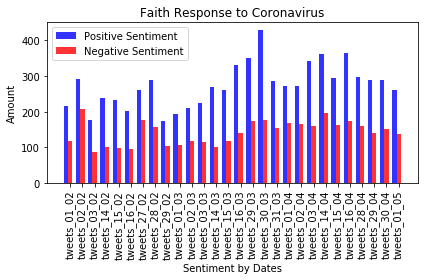

In [19]:
# extract information from sentiment_count_dictionary

x = list(sentiment_count_dictionary.keys())
y = [[sentiment_count_dictionary[a_key][i] for i in sentiment_count_dictionary[a_key].keys()] for a_key in x] #creates a list of lists of two elements

# data to plot
n_groups = len(x)
positive_sentiment = tuple([y[i][0] for i in range(len(y))]) #first element of each list is the positive count
negative_sentiment = tuple([y[i][1] for i in range(len(y))]) #second element of each list is the negative count

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, positive_sentiment, bar_width,
alpha=opacity,
color='b',
label='Positive Sentiment')

rects2 = plt.bar(index + bar_width, negative_sentiment, bar_width,
alpha=opacity,
color='r',
label='Negative Sentiment')

plt.xlabel('Sentiment by Dates')
plt.ylabel('Amount')
plt.title('Faith Response to Coronavirus')
plt.xticks(index + bar_width, tuple(x))
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

###### When the news of the virus came out people started posting about God, but then by the end of the first month it significantly dropped, this was probably due to the fact that it was not taken seriously, mostly in the United States. But then in March it became a reality for almost all the world so we see an increase during the month of March and for the month of April there was an almost stationary trend. It is how the positve sentiment outperforms the negative one for all the days. Usually people believe that God punishes people for their mistakes, but in this case we have seen how people actually turn to God when the times were rough and hopeless.